In [1]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd
import warnings
import sys
import os

warnings.filterwarnings("ignore")

import sys
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../" * 2))
sys.path.insert(0, BASE_DIR)

from setting import plt
from script.一致性测试.setting import NS, FUNC_NAMES, AMPS, FUNC_NAMES_ALIAS

Use environmental variables in default.yml


In [2]:
methods = [
    "PearsonCorr", "SpearmanCorr", "DistCorr", 
    "MI-cut", "MI-qcut", "MI-Darbellay", "MI-KDE", "MI-GIEF", "MIC", "RMIC"]

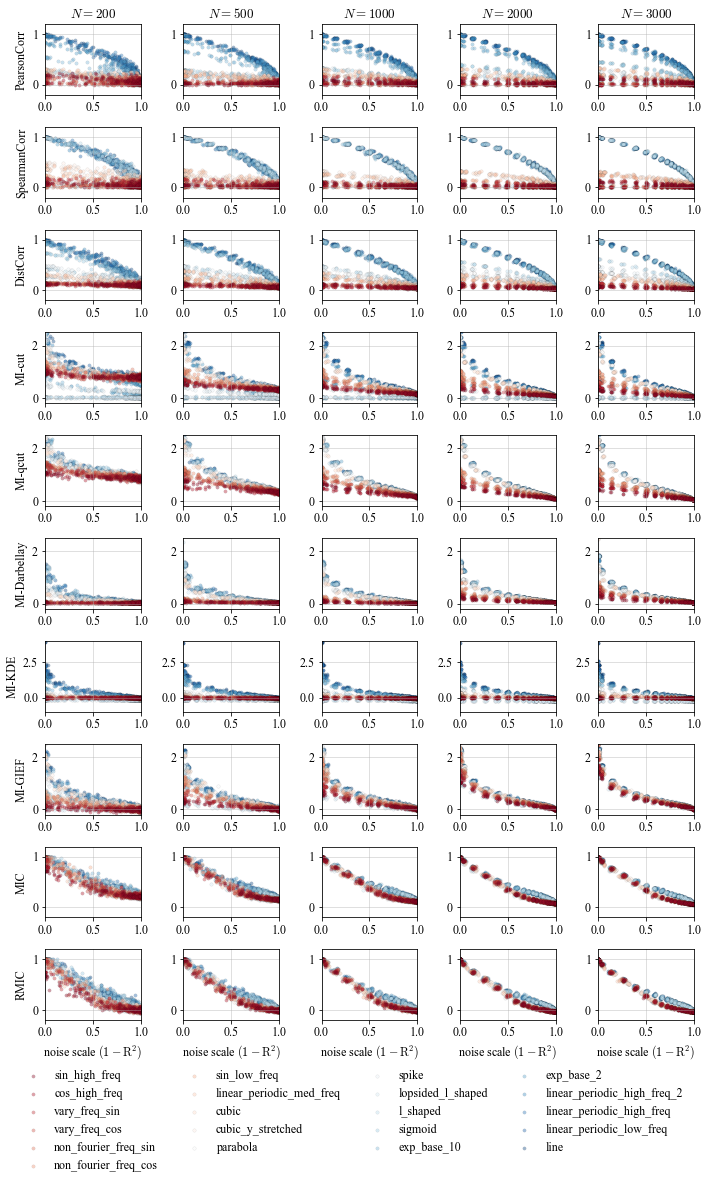

In [3]:
cmap = plt.get_cmap("RdBu")
cNorm = colors.Normalize(vmin=0, vmax=len(FUNC_NAMES) + 1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

fig, axs = plt.subplots(len(methods), len(NS), figsize=[10, 15])
for i, method in enumerate(methods):
    for j, N in enumerate(NS):
        results = pd.read_csv(
            f"{BASE_DIR}/script/一致性测试/file/info_measure_{method}_{N}.csv")
        results.rename(columns={"noise": "noise.0"}, inplace=True)
        
        for k, func in enumerate(FUNC_NAMES):
            # axs[i, j].scatter(
            #     results[f"noise.{k}"], results[func], s=12, marker="o", 
            #     color=scalarMap.to_rgba(k + 1), linewidth=0.1, edgecolor="k", 
            #     label=func_names_alias[k], alpha=0.2, zorder=-k)
            axs[i, j].scatter(
                results[f"noise.{k}"], results[func], s=12, marker="o", 
                color=scalarMap.to_rgba(k + 1), linewidth=0.1, edgecolor="k", 
                label=FUNC_NAMES[k], alpha=0.4, zorder=-k)

        axs[i, j].set_xlim([0.0, 1.0])
        axs[i, j].grid(alpha=0.5)

        if method == "MI":
            ylim = [-1.0, 4.0]
        elif method == "MI-KDE":
            ylim = [-1.0, 4.0]
        elif (method == "SpearmanCorr") or (method not in ["MI-GIEF", "MI-KDE", "MI-qcut", "MI-cut", "MI-Darbellay"]):
            ylim = [-0.2, 1.2]
        else:
            ylim = [-0.2, 2.5]                                                                                                                                                                              
        axs[i, j].set_ylim(ylim)
                                    
        if i == 0:
            axs[i, j].set_title(f"$N = {N}$", fontsize=13)

        if i == len(methods) - 1:
            axs[i, j].set_xlabel("noise scale $(1-\\rm{R}^2)$", fontsize=12)

        if j == 0:
            axs[i, j].set_ylabel(method, fontsize=12)

fig.tight_layout()
plt.legend(bbox_to_anchor=(1, -0.55),
            ncol=len(FUNC_NAMES) // 5, frameon=False, fontsize=12)